In [60]:
#!pip install -U ultralytics

In [61]:
import os
import shutil
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

In [62]:
root= Path("dataset/CVSubset/FLAME")
fimg=root/'Fire'/'Thermal'/'Raw JPG'
nfimg=root/'No Fire'/'Thermal'/'Raw JPG'
label=root/'Fire'/'labels'
y_dataset = root/'yolo_dataset'

In [63]:
itrain = y_dataset/'images'/'train'
ival=y_dataset/'images'/'val'
itest = y_dataset / 'images' / 'test'
lab_tst = y_dataset / 'labels' / 'test'
lab_train = y_dataset/'labels'/'train'
lab_val = y_dataset/'labels'/'val'

In [64]:
for folder in [itrain,ival,itest,lab_train,lab_val,lab_tst]:
    folder.mkdir(parents=True, exist_ok=True)

In [65]:
fire_images = list(fimg.glob('*.JPG'))
no_fire=list(nfimg.glob('*.JPG'))

In [66]:
firelab=[label/(img.stem + '.txt') for img in fire_images]
nofirelab=[None] * len(no_fire)

In [67]:
all_img = no_fire + fire_images
all_label = firelab + nofirelab
all_class = [0] * len(fire_images) + [1] * len(no_fire)

In [68]:
print(1,all_img,'\n\n',2,all_label,'\n\n',3,all_class)

1 [PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00112.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00107.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00099.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00070.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00075.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00083.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00073.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00072.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00037.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00097.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00027.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00019.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00094.JPG'), PosixPath('dataset/CVSubset/FLAME/No Fire/Thermal/Raw JPG/00064.JPG'), Pos

In [69]:
img_temp, tst_img, lbl_temp, tst_lbl = train_test_split(all_img, all_label, test_size=0.1, random_state=42, stratify=all_class)

train_img,val_img,train_lbl,val_lbl = train_test_split(img_temp,lbl_temp,test_size=0.2,random_state=42)

In [70]:
def copy_data(img_lst,lbl_lst,img_dest,lbl_dest):
    for img,lbl in zip(img_lst,lbl_lst):
        shutil.copy(img,img_dest / img.name)
        if lbl is not None and lbl.exists():
            shutil.copy(lbl,lbl_dest / lbl.name )
        else:
            (lbl_dest / (img.stem + '.txt')).write_text("")

In [71]:
copy_data(train_img,train_lbl,itrain,lab_train)
copy_data(val_img,val_lbl,ival,lab_val)
copy_data(tst_img,tst_lbl,itest,lab_tst)
print("Successfully dataset prepared",y_dataset)

Successfully dataset prepared dataset/CVSubset/FLAME/yolo_dataset


In [72]:
ls dataset/CVSubset/FLAME/yolo_dataset/images/val

00001.JPG  00297.JPG
00002.JPG  00303.JPG
00007.JPG  00310.JPG
00008.JPG  00312.JPG
00011.JPG  00315.JPG
00016.JPG  00330.JPG
00020.JPG  00333.JPG
00024.JPG  00340.JPG
00028.JPG  00341.JPG
00031.JPG  00343.JPG
00034.JPG  00344.JPG
00037.JPG  00345.JPG
00042.JPG  00346.JPG
00043.JPG  00347.JPG
00046.JPG  00357.JPG
00048.JPG  00375.JPG
00051.JPG  00376.JPG
00065.JPG  00382.JPG
00068.JPG  00384.JPG
00069.JPG  00388.JPG
00070.JPG  00396.JPG
00080.JPG  00415.JPG
00084.JPG  00419.JPG
00085.JPG  00425.JPG
00088.JPG  00426.JPG
00090.JPG  00431.JPG
00092.JPG  00433.JPG
00094.JPG  00435.JPG
00100.JPG  00444.JPG
00101.JPG  00446.JPG
00102.JPG  00456.JPG
00108.JPG  00462.JPG
00109.JPG  00469.JPG
00114.JPG  00471.JPG
00115.JPG  00480.JPG
00119.JPG  00482.JPG
00121.JPG  00484.JPG
00126.JPG  00493.JPG
00135.JPG  00494.JPG
00136.JPG  00497.JPG
00137.JPG  00499.JPG
00153.JPG  00503.JPG
00154.JPG  00516.JPG
00162.JPG  00526.JPG
00181.JPG  00532.JPG
00188.JPG  00536.JPG
00189.JPG  00538.JPG
00190.JPG  00

In [81]:
model = YOLO('yolov8n.pt')  

model.train(
    data='fire.yaml',
    epochs=100,
    imgsz=640,
    batch=4,
    name='yolov8_fire_detection'
)

Ultralytics 8.3.152 🚀 Python-3.12.2 torch-2.7.0+cu118 CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=fire.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_fire_detection66, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

train: Scanning /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/labels/train... 42 images, 0 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<00:00, 2176.06it/s]

train: New cache created: /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/labels/train.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1337.7±247.1 MB/s, size: 47.8 KB)



/home/lakshmi/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/labels/val... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 2006.76it/s]

val: New cache created: /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/labels/val.cache
Plotting labels to runs/detect/yolov8_fire_detection66/labels.jpg... 



/home/lakshmi/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8_fire_detection66
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.761       4.01      1.592          2        640: 100%|██████████| 11/11 [00:10<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         12         18    0.00812      0.667      0.148      0.076

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/100         0G      1.561      3.397      1.428          9        640: 100%|██████████| 11/11 [00:09<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         12         18     0.0106      0.944      0.455      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G       1.54      2.515       1.37          6        640: 100%|██████████| 11/11 [00:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         12         18     0.0114          1      0.642      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.496      2.107      1.386          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         12         18      0.931      0.444      0.704      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.618      2.048      1.416          6        640: 100%|██████████| 11/11 [00:08<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         12         18      0.839      0.291      0.542      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.513      2.036      1.336         13        640: 100%|██████████| 11/11 [00:08<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         12         18          1      0.263      0.497      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.536      1.891      1.439          7        640: 100%|██████████| 11/11 [00:08<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         12         18      0.774      0.389      0.574      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      8/100         0G      1.668      1.999      1.481          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         12         18      0.922        0.5       0.68      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G       1.53      1.847      1.432          9        640: 100%|██████████| 11/11 [00:08<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         12         18      0.922        0.5       0.68      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     10/100         0G      1.566      1.692      1.428          8        640: 100%|██████████| 11/11 [00:08<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         12         18      0.834      0.667      0.737      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     11/100         0G      1.648      1.838      1.478          3        640: 100%|██████████| 11/11 [00:08<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         12         18      0.743      0.667      0.723      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     12/100         0G      1.583       1.83      1.456          2        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         12         18      0.743      0.667      0.723      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     13/100         0G       1.44      1.879      1.393          6        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         12         18      0.536      0.667       0.55      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.609      1.791      1.491         11        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         12         18          1       0.77       0.92      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.545       1.62      1.414         12        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         12         18          1       0.77       0.92      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.513      1.845      1.537         11        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         12         18      0.789      0.833      0.816      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     17/100         0G      1.536      1.813      1.415         11        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         12         18      0.838      0.722      0.859      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     18/100         0G      1.495      1.646      1.387         11        640: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         12         18      0.722      0.778      0.736      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     19/100         0G      1.448      1.573      1.351         25        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         12         18      0.722      0.778      0.736      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     20/100         0G      1.453      1.674      1.386          3        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         12         18      0.725      0.889      0.809      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.387      1.552       1.39          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         12         18      0.944      0.931      0.936      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.407      1.657      1.437         14        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         12         18      0.944      0.931      0.936      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.472      1.578       1.34         16        640: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         12         18      0.994      0.889      0.968       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.371      1.538      1.268          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         12         18      0.924      0.944      0.965      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     25/100         0G      1.434      1.436      1.308          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         12         18      0.924      0.944      0.965      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      1.384      1.387        1.3          6        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         12         18      0.944      0.778      0.951      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     27/100         0G      1.421      1.355      1.321         11        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         12         18      0.898          1       0.93      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.409      1.462       1.42          2        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         12         18      0.898          1       0.93      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     29/100         0G      1.302      1.539      1.302         13        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         12         18      0.982          1      0.995      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.386      1.559      1.371         14        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         12         18      0.899      0.988      0.987      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     31/100         0G      1.436      1.453      1.329         22        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         12         18      0.899      0.988      0.987      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     32/100         0G      1.354      1.474       1.36          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         12         18      0.996      0.944      0.992      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.309      1.306       1.27          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         12         18      0.994      0.944      0.986      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     34/100         0G      1.355      1.285      1.364         24        640: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         12         18      0.935      0.944       0.98      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     35/100         0G      1.343       1.23      1.267          8        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         12         18      0.935      0.944       0.98      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     36/100         0G      1.262      1.285      1.263         20        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         12         18      0.934      0.944      0.978      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     37/100         0G      1.234        1.2      1.214         17        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         12         18      0.922      0.944      0.958      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     38/100         0G      1.331      1.157      1.266         12        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         12         18      0.922      0.944      0.958      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     39/100         0G      1.246      1.295       1.25          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         12         18      0.932      0.944      0.967      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G       1.26       1.35      1.275          3        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         12         18      0.996      0.944      0.986      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.177      1.185        1.2         18        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         12         18      0.996      0.944      0.986      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.307      1.288      1.308          7        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         12         18      0.899      0.986      0.987      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      1.273      1.254      1.302          7        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         12         18      0.941      0.944      0.981      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     44/100         0G      1.149      1.538      1.262          3        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         12         18      0.941      0.944      0.981      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     45/100         0G      1.319       1.27      1.307          8        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         12         18       0.94      0.944      0.966      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      1.199      1.328       1.23          2        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         12         18          1      0.936      0.963      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      1.289      1.199      1.224          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         12         18          1      0.936      0.963      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     48/100         0G       1.16      1.156      1.225          7        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         12         18          1      0.936      0.976      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     49/100         0G      1.059      1.224      1.186          3        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         12         18      0.992      0.944       0.99      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      1.309       1.23      1.368         11        640: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         12         18          1      0.936      0.986      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     51/100         0G      1.297      1.142      1.153          2        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         12         18          1      0.936      0.986      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.154      1.179      1.222          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         12         18      0.942      0.944      0.979      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      1.227      1.134      1.227          8        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         12         18      0.939      0.944      0.968      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     54/100         0G      1.099      1.219      1.192          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         12         18      0.939      0.944      0.968      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     55/100         0G      1.202      1.092       1.19         18        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         12         18      0.937      0.944      0.968       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     56/100         0G      1.206      1.093      1.218         24        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         12         18      0.934      0.944      0.971      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     57/100         0G      1.162      1.169      1.212          2        640: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         12         18      0.934      0.944      0.971      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     58/100         0G      1.162      1.015      1.149         23        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         12         18      0.931      0.944      0.976      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      1.235      1.193      1.254          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         12         18      0.944      0.937      0.987      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     60/100         0G      1.104      1.073      1.162          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         12         18      0.944      0.937      0.987      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     61/100         0G      1.145      1.062       1.18          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         12         18          1      0.938      0.992      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G       1.04      1.085      1.162          2        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         12         18      0.994          1      0.995      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     63/100         0G      1.108      1.107       1.17          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         12         18      0.994          1      0.995      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     64/100         0G      1.037      1.007      1.126          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         12         18      0.996          1      0.995      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     65/100         0G      1.104     0.9378      1.098         13        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         12         18          1          1      0.995      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     66/100         0G      1.042     0.9967      1.133         14        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         12         18          1      0.998      0.995      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     67/100         0G      1.196      1.108      1.279          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         12         18          1      0.998      0.995      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     68/100         0G      1.038      1.044      1.131         33        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         12         18          1      0.997      0.995      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     69/100         0G      1.051      0.985      1.166          7        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         12         18          1      0.992      0.995      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     70/100         0G      1.051     0.9764      1.141         19        640: 100%|██████████| 11/11 [00:07<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         12         18          1      0.992      0.995      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     71/100         0G     0.9501     0.9647      1.102          9        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         12         18          1      0.944       0.99      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      1.062       1.04      1.204          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         12         18          1      0.944      0.986      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     73/100         0G      1.025      1.002      1.145         13        640: 100%|██████████| 11/11 [00:07<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         12         18          1      0.944      0.986      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     74/100         0G     0.9411     0.9564      1.103          9        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         12         18      0.999      0.944      0.984      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     75/100         0G      1.009     0.9997      1.144          3        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         12         18      0.996      0.944      0.983       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     76/100         0G      1.128      1.027      1.186          7        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         12         18      0.996      0.944      0.983       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     77/100         0G      1.075     0.9811      1.146         11        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         12         18      0.994      0.944      0.984      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     78/100         0G      1.053      1.011      1.117         19        640: 100%|██████████| 11/11 [00:08<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         12         18      0.995      0.944      0.984      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      1.158      1.017      1.124          2        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         12         18      0.995      0.944      0.984      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G       1.08      1.051       1.12          7        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         12         18      0.995      0.944      0.984      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     81/100         0G     0.9041     0.9871      1.104          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         12         18      0.995      0.944      0.981      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     82/100         0G     0.9526     0.9089      1.072         14        640: 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         12         18      0.995      0.944       0.98      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      1.034     0.9071      1.071          6        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         12         18      0.995      0.944       0.98      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     84/100         0G      1.007     0.9191      1.118          3        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


                   all         12         18      0.995      0.944      0.971      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      1.097     0.9253      1.125         16        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         12         18      0.995      0.944      0.965      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     86/100         0G     0.9743     0.8724      1.084          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         12         18      0.995      0.944      0.965      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     87/100         0G     0.9019     0.8744      1.062          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         12         18      0.995      0.944      0.958       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     88/100         0G     0.9633     0.9111      1.113          8        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         12         18      0.996      0.944      0.953      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G      1.007     0.9223      1.095         21        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         12         18      0.996      0.944      0.953      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     90/100         0G      1.025     0.8871       1.11         13        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         12         18      0.995      0.944      0.952      0.629
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



/home/lakshmi/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
     91/100         0G     0.9257      1.046      1.106         15        640: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         12         18      0.994      0.944      0.952      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     92/100         0G      1.007     0.9981      1.181          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         12         18      0.994      0.944      0.952      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     93/100         0G     0.9568     0.9873      1.141          5        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         12         18      0.993      0.944      0.953      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     94/100         0G     0.9979      1.011      1.118          4        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         12         18      0.992      0.944      0.953       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     95/100         0G     0.9631      1.014      1.099          2        640: 100%|██████████| 11/11 [00:08<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         12         18      0.992      0.944      0.953       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     96/100         0G     0.9482      1.005      1.062         13        640: 100%|██████████| 11/11 [00:08<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         12         18      0.986      0.944      0.951      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     97/100         0G     0.9358      0.991       1.09          2        640: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         12         18      0.982      0.944      0.952      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     98/100         0G      1.025       1.09      1.195          3        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         12         18      0.981      0.944      0.952      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     99/100         0G     0.9216     0.9948      1.068          3        640: 100%|██████████| 11/11 [00:08<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         12         18      0.981      0.944      0.952      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    100/100         0G     0.9723     0.9652      1.158          8        640: 100%|██████████| 11/11 [00:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         12         18      0.979      0.944      0.951      0.663



100 epochs completed in 0.256 hours.
Optimizer stripped from runs/detect/yolov8_fire_detection66/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_fire_detection66/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_fire_detection66/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.12.2 torch-2.7.0+cu118 CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


                   all         12         18      0.899      0.986      0.987      0.698
                  fire         12         18      0.899      0.986      0.987      0.698
Speed: 1.8ms preprocess, 49.1ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/yolov8_fire_detection66


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x70f1a3bffc20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [82]:
results = model.val(
    data='fire.yaml',
    split='test' 
)
print(results)

Ultralytics 8.3.152 🚀 Python-3.12.2 torch-2.7.0+cu118 CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1524.0±339.0 MB/s, size: 48.4 KB)


val: Scanning /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/labels/test... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 1144.06it/s]

val: New cache created: /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/labels/test.cache



/home/lakshmi/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


                   all          6         13      0.866          1      0.986      0.586
                  fire          6         13      0.866          1      0.986      0.586
Speed: 1.2ms preprocess, 111.9ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/yolov8_fire_detection662
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x70f1a2dbad80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    

In [83]:
presults = model.predict(source=str(itest), conf=0.25, save=True)


image 1/6 /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/images/test/5-Thermal_Fusion-43_jpg.rf.9f6ca3c312926c9bc4fad3c9a144181e.jpg: 512x640 4 fires, 73.7ms
image 2/6 /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/images/test/5-Thermal_Fusion-47_jpg.rf.dcb514a123af3ce93922dffa4fd01272.jpg: 512x640 5 fires, 36.5ms
image 3/6 /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/images/test/5-Thermal_Fusion-51_jpg.rf.e532a469728d133af20e101c85c24ff8.jpg: 512x640 2 fires, 36.6ms
image 4/6 /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/images/test/5-Thermal_Fusion-64_jpg.rf.70103f40c44c5636a49cab7c649640e2.jpg: 512x640 2 fires, 37.5ms
image 5/6 /home/lakshmi/collage/project/vssc/wildfire-detection/dataset/CVSubset/FLAME/yolo_dataset/images/test/5-Thermal_Fusion-71_jpg.rf.084eee3dc2086ed614b169b82ca3ec72.jpg: 512x640 2 fires, 3

In [84]:
preds = []
y_true = []

for result, lbl in zip(presults, tst_lbl):
    if lbl is not None and lbl.exists():
        y_true.append(1)
    else:
        y_true.append(0)

    if result.boxes is not None and result.boxes.cls.numel() > 0:
        preds.append(int(result.boxes.cls[0]))
    else:
        preds.append(-1)

In [85]:
valid_preds = []
valid_y_true = []
for p, y in zip(preds, y_true):
    if p != -1:
        valid_preds.append(p)
        valid_y_true.append(y)

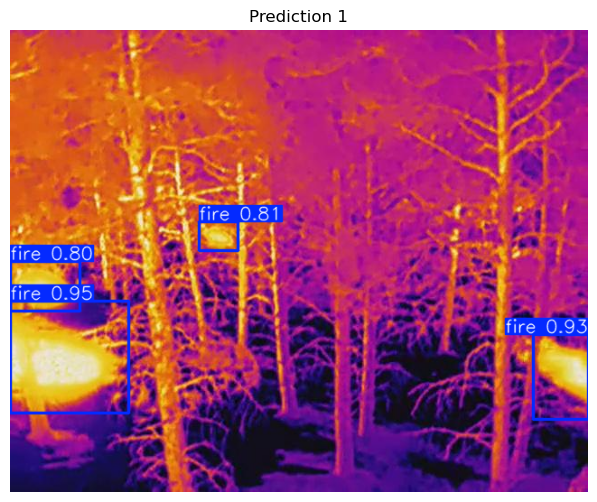

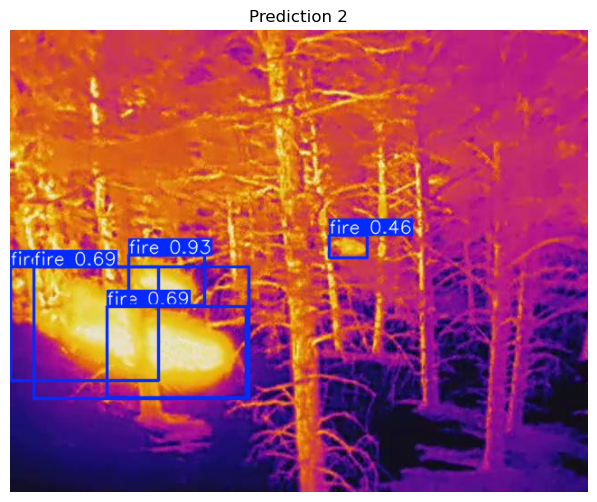

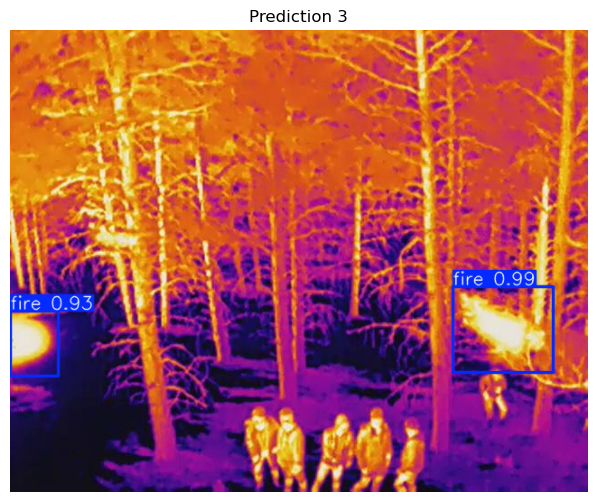

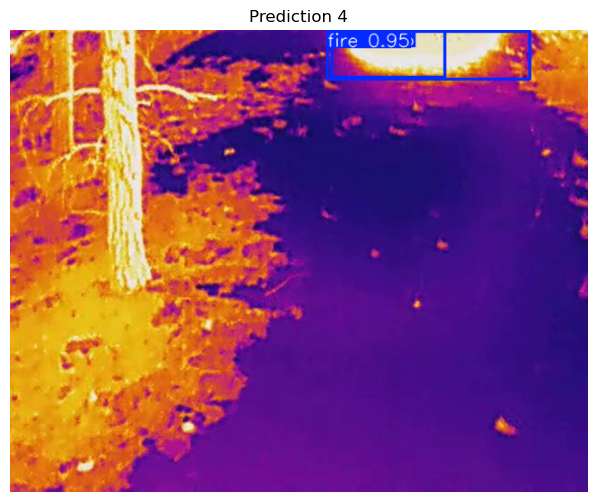

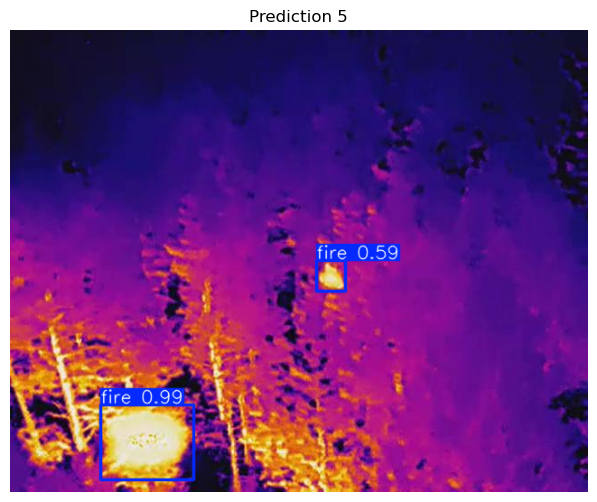

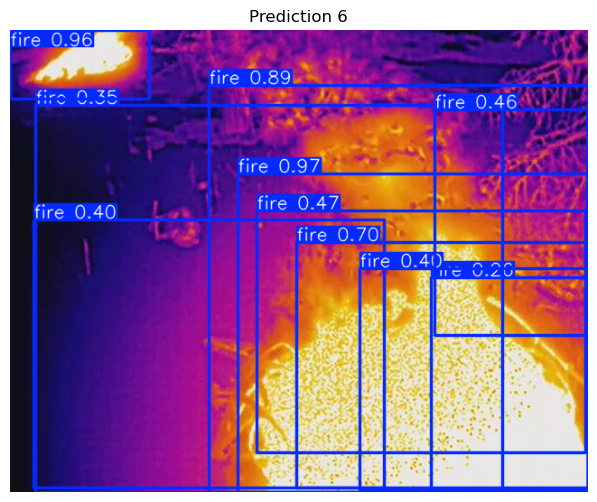

In [86]:
%matplotlib inline
for i, result in enumerate(presults):
    img = result.plot()  
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'Prediction {i + 1}')
    plt.show()